# CSE 258 - HW 1
Jin Dai / A92408103

## Classification (week 2)

In [263]:
from urllib.request import urlopen

In [264]:
def parse_data_from_url(fname):
  for l in urlopen(fname):
    yield eval(l)

In [265]:
beer_reviews = list(parse_data_from_url("https://cseweb.ucsd.edu/classes/fa21/cse258-b/data/beer_50000.json"))

In [266]:
beer_reviews[0]

{'review/appearance': 2.5,
 'beer/style': 'Hefeweizen',
 'review/palate': 1.5,
 'review/taste': 1.5,
 'beer/name': 'Sausa Weizen',
 'review/timeUnix': 1234817823,
 'beer/ABV': 5.0,
 'beer/beerId': '47986',
 'beer/brewerId': '10325',
 'review/timeStruct': {'isdst': 0,
  'mday': 16,
  'hour': 20,
  'min': 57,
  'sec': 3,
  'mon': 2,
  'year': 2009,
  'yday': 47,
  'wday': 0},
 'review/overall': 1.5,
 'review/text': 'A lot of foam. But a lot.\tIn the smell some banana, and then lactic and tart. Not a good start.\tQuite dark orange in color, with a lively carbonation (now visible, under the foam).\tAgain tending to lactic sourness.\tSame for the taste. With some yeast and banana.',
 'user/profileName': 'stcules',
 'review/aroma': 2.0}

### Question. 7

In [267]:
data = [d for d in beer_reviews if 'review/overall' in d and 'review/text' in d]

In [268]:
def featurize(data, featurizer):
    return [featurizer(d) for d in data]

In [269]:
X = featurize(data, lambda d : [1, len(d['review/text'])])

In [270]:
X[0:10]

[[1, 262],
 [1, 338],
 [1, 396],
 [1, 401],
 [1, 1145],
 [1, 728],
 [1, 471],
 [1, 853],
 [1, 472],
 [1, 1035]]

In [271]:
def extract_labels(data):
    return [1 if d['review/overall'] >= 4 else 0 for d in data]

In [272]:
y = extract_labels(data)

In [273]:
y[0:10]

[0, 0, 0, 0, 1, 0, 0, 0, 1, 1]

In [274]:
from sklearn import linear_model

In [275]:
mod = linear_model.LogisticRegression(C=1.0, class_weight='balanced')
mod.fit(X,y)

LogisticRegression(class_weight='balanced')

In [276]:
pred = mod.predict(X)

In [277]:
correct = [(a == b) for a, b in zip(y, pred)]

In [278]:
correct[0:10]

[True, True, True, True, True, False, True, False, False, True]

In [279]:
sum(correct) / len(correct)

0.49408

In [280]:
import numpy as np

In [281]:
# True positives, false positives, etc.
TP_ = np.logical_and(pred, y)
FP_ = np.logical_and(pred, np.logical_not(y))
TN_ = np.logical_and(np.logical_not(pred), np.logical_not(y))
FN_ = np.logical_and(np.logical_not(pred), y)

TP = sum(TP_)
FP = sum(FP_)
TN = sum(TN_)
FN = sum(FN_)

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
FPR = 1 - TNR
FNR = 1 - TPR

# BER
BER = 1 - 0.5 * (TP / (TP + FN) + TN / (TN + FP))

In [282]:
print("True Positive: %d" % TP)
print("True Negative: %d" % TN)
print("False Positive: %d" % FP)
print("False Negative: %d" % FN)
print("True Positive Rate: %.4f" % TPR)
print("True Negative Rate: %.4f" % TNR)
print("False Positive Rate: %.4f" % FPR)
print("False Negative Rate: %.4f" % FNR)
print("Balanced Error Rate: %.6f" % BER)

True Positive: 14201
True Negative: 10503
False Positive: 5885
False Negative: 19411
True Positive Rate: 0.4225
True Negative Rate: 0.6409
False Positive Rate: 0.3591
False Negative Rate: 0.5775
Balanced Error Rate: 0.468303


### Question. 8

In [283]:
# conf = mod.decision_function(X)

In [284]:
# confSorted = list(zip(conf, y))
# confSorted.sort(key=lambda t: t[0], reverse=True)

In [285]:
# confSorted[:10]

In [286]:
prob = mod.predict_proba(X)
probSorted = list(zip(prob, y))

In [287]:
probSorted[0][0][1]

0.46054325276076535

In [288]:
probSorted.sort(key=lambda t : t[0][1], reverse=True)

In [289]:
probSorted[:10]

[(array([0.19459931, 0.80540069]), 1),
 (array([0.19643684, 0.80356316]), 1),
 (array([0.20622631, 0.79377369]), 1),
 (array([0.21202257, 0.78797743]), 1),
 (array([0.21655241, 0.78344759]), 1),
 (array([0.22127384, 0.77872616]), 1),
 (array([0.22724752, 0.77275248]), 0),
 (array([0.23156561, 0.76843439]), 1),
 (array([0.23498476, 0.76501524]), 1),
 (array([0.23606837, 0.76393163]), 0)]

In [290]:
probSorted[-10:]

[(array([0.56239992, 0.43760008]), 1),
 (array([0.56239992, 0.43760008]), 1),
 (array([0.56239992, 0.43760008]), 0),
 (array([0.56239992, 0.43760008]), 1),
 (array([0.56239992, 0.43760008]), 1),
 (array([0.56239992, 0.43760008]), 1),
 (array([0.56239992, 0.43760008]), 1),
 (array([0.56239992, 0.43760008]), 1),
 (array([0.56239992, 0.43760008]), 0),
 (array([0.56239992, 0.43760008]), 0)]

In [291]:
import matplotlib.pyplot as plt

In [292]:
# plot a graph
K = np.array([1, 10, 100, 1000, 2000, 4000, 6000, 8000, 10000])

No handles with labels found to put in legend.


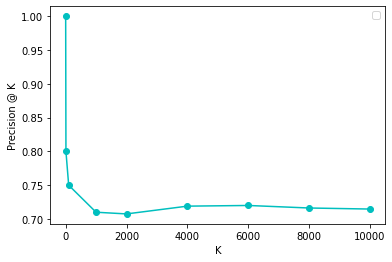

In [293]:
p_at_k = np.array([sum(map(lambda x : x[1], probSorted[:k])) / k for k in K])
plt.plot(K, p_at_k, 'co-')
plt.xlabel('K')
plt.ylabel('Precision @ K')
plt.legend()
plt.show()

### Question. 9

In [294]:
pred_y = [1 if p[1] > p[0] else 0 for p in prob]
probSorted2 = list(zip(prob, y, pred_y))

In [295]:
probSorted2[:10]

[(array([0.53945675, 0.46054325]), 0, 0),
 (array([0.53276565, 0.46723435]), 0, 0),
 (array([0.52765121, 0.47234879]), 0, 0),
 (array([0.52721003, 0.47278997]), 0, 0),
 (array([0.46146669, 0.53853331]), 1, 1),
 (array([0.49829621, 0.50170379]), 0, 1),
 (array([0.52102926, 0.47897074]), 0, 0),
 (array([0.48723601, 0.51276399]), 0, 1),
 (array([0.52094091, 0.47905909]), 1, 0),
 (array([0.4711576, 0.5288424]), 1, 1)]

In [296]:
probSorted2.sort(key=lambda t : abs(t[0][1] - 0.5), reverse=True)

In [297]:
probSorted2[:10]

[(array([0.19459931, 0.80540069]), 1, 1),
 (array([0.19643684, 0.80356316]), 1, 1),
 (array([0.20622631, 0.79377369]), 1, 1),
 (array([0.21202257, 0.78797743]), 1, 1),
 (array([0.21655241, 0.78344759]), 1, 1),
 (array([0.22127384, 0.77872616]), 1, 1),
 (array([0.22724752, 0.77275248]), 0, 1),
 (array([0.23156561, 0.76843439]), 1, 1),
 (array([0.23498476, 0.76501524]), 1, 1),
 (array([0.23606837, 0.76393163]), 0, 1)]

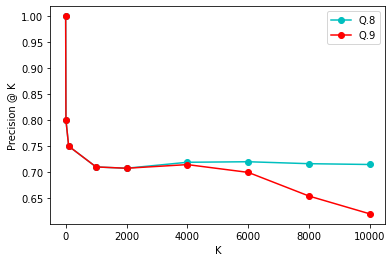

In [298]:
p2_at_k = np.array([sum(map(lambda x : 1 if x[1] == x[2] else 0, probSorted2[:k])) / k for k in K])
plt.plot(K, p_at_k, 'co-', label='Q.8')
plt.plot(K, p2_at_k, 'ro-', label='Q.9')
plt.xlabel('K')
plt.ylabel('Precision @ K')
plt.legend()
plt.show()

In [299]:
p2_at_1 = sum(map(lambda x : 1 if x[1] == x[2] else 0, probSorted2[:1])) / 1
p2_at_100 = sum(map(lambda x : 1 if x[1] == x[2] else 0, probSorted2[:100])) / 100
p2_at_10000 = sum(map(lambda x : 1 if x[1] == x[2] else 0, probSorted2[:10000])) / 10000

In [300]:
print("precision@1 = %.4f" % p2_at_1)
print("precision@100 = %.4f" % p2_at_100)
print("precision@10000 = %.4f" % p2_at_10000)

precision@1 = 1.0000
precision@100 = 0.7500
precision@10000 = 0.6196
